# Sentiment Trends : Predicting Product recommentations via text analysis



In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest, Ada Boosting, CatBoost and XGBoost), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


 # Dataset Explanation 
   The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. Also each row corresponds to a customer review, and includes the variables:

         Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
         Age: Positive Integer variable of the reviewers age.
         Title: String variable for the title of the review.
         Review Text: String variable for the review body.
         Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
         Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
         Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
         Division Name: Categorical name of the product high level division.
         Department Name: Categorical name of the product department name.
         Class Name: Categorical name of the product class name.
       


In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller


# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [4]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...

[nltk_data]   Unzipping tokenizers/punkt.zip.

[nltk_data] Downloading package stopwords to /root/nltk_data...

[nltk_data]   Unzipping corpora/stopwords.zip.

[nltk_data] Downloading package wordnet to /root/nltk_data...

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
import matplotlib
import sklearn
import autocorrect

# Autocorrect Version
try:
    import importlib.metadata as metadata
except ImportError:
    import importlib_metadata as metadata

print("Pandas Version: ", pd.__version__)
print("NumPy Version: ", np.__version__)
print("Matplotlib Version: ", matplotlib.__version__)
print("Seaborn Version: ", sns.__version__)
print("NLTK Version: ", nltk.__version__)
print("Scikit-Learn Version: ", sklearn.__version__)
print("Autocorrect Version: ", metadata.version("autocorrect"))

Pandas Version:  1.5.3

NumPy Version:  1.23.5

Matplotlib Version:  3.7.1

Seaborn Version:  0.12.2

NLTK Version:  3.8.1

Scikit-Learn Version:  1.2.2

Autocorrect Version:  2.6.1


In [9]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
###############################################################################
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')

#     df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
#     print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Descriptive Statistics \n", attrs=['bold']), df.describe().round(2),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.
#     print(colored("Descriptive Statistics (Categorical Columns) \n", attrs=['bold']), df.describe(include=object).T,'\n',
#           colored('*'*100, 'red', attrs=['bold']), sep='') # Gives a statstical breakdown of the data.

###############################################################################
def first_look(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))
###############################################################################


def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################


# Data Understanding

In [10]:
df0 = pd.read_csv("/content/drive/MyDrive/NLP Project/Womens Clothing E-Commerce Reviews.csv", error_bad_lines=False).drop(columns = "Unnamed: 0")
df = df0.copy()
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23486 entries, 0 to 23485

Data columns (total 10 columns):

 #   Column                   Non-Null Count  Dtype 

---  ------                   --------------  ----- 

 0   Clothing ID              23486 non-null  int64 

 1   Age                      23486 non-null  int64 

 2   Title                    19676 non-null  object

 3   Review Text              22641 non-null  object

 4   Rating                   23486 non-null  int64 

 5   Recommended IND          23486 non-null  int64 

 6   Positive Feedback Count  23486 non-null  int64 

 7   Division Name            23472 non-null  object

 8   Department Name          23472 non-null  object

 9   Class Name               23472 non-null  object

dtypes: int64(5), object(5)

memory usage: 1.8+ MB


In [12]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [13]:
first_looking(df)
duplicate_values(df)

Shape:(23486, 10)

****************************************************************************************************

Info:



<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23486 entries, 0 to 23485

Data columns (total 10 columns):

 #   Column                   Non-Null Count  Dtype 

---  ------                   --------------  ----- 

 0   Clothing ID              23486 non-null  int64 

 1   Age                      23486 non-null  int64 

 2   Title                    19676 non-null  object

 3   Review Text              22641 non-null  object

 4   Rating                   23486 non-null  int64 

 5   Recommended IND          23486 non-null  int64 

 6   Positive Feedback Count  23486 non-null  int64 

 7   Division Name            23472 non-null  object

 8   Department Name          23472 non-null  object

 9   Class Name               23472 non-null  object

dtypes: int64(5), object(5)

memory usage: 1.8+ MB

None

****************************************************

In [14]:
missing_values(df)

,Missing_Number,Missing_Percent
Title,3789,16.147454
Review Text,825,3.515875
Division Name,14,0.059663
Department Name,14,0.059663
Class Name,14,0.059663


In [15]:
# Checking Mixed Type of Data:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''

    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column Title has mixed object types.

Column Review Text has mixed object types.

Column Division Name has mixed object types.

Column Department Name has mixed object types.

Column Class Name has mixed object types.


In [16]:
# # import warnings

# # Filtreleme yapmadan önce tüm uyarıları yakalayın
# warnings.filterwarnings("ignore")
# from dataprep.datasets import load_dataset
# from dataprep.eda import create_report
# create_report(df).show_browser()

In [17]:
for i in df.columns[:]:
    print("*" * 30)
    print("Column Name: ", i)
    print()
    print("Number of NaN values in the column: ", df[i].isnull().sum())
    print()
    print("What percentage of the column consists of NaN values?", (df[i].isnull().sum() / len(df)) * 100)
    print()
    print("Value counts for the column:\n", df[i].value_counts(dropna=False))

******************************

Column Name:  Clothing ID



Number of NaN values in the column:  0



What percentage of the column consists of NaN values? 0.0



Value counts for the column:

 1078    1021

862      802

1094     753

1081     582

872      544

        ... 

776        1

668        1

633        1

734        1

522        1

Name: Clothing ID, Length: 1206, dtype: int64

******************************

Column Name:  Age



Number of NaN values in the column:  0



What percentage of the column consists of NaN values? 0.0



Value counts for the column:

 39    1267

35     905

36     839

34     802

38     779

      ... 

93       2

90       2

86       2

99       2

92       1

Name: Age, Length: 77, dtype: int64

******************************

Column Name:  Title



Number of NaN values in the column:  3789



What percentage of the column consists of NaN values? 16.147453654378864



Value counts for the column:

 NaN                                      

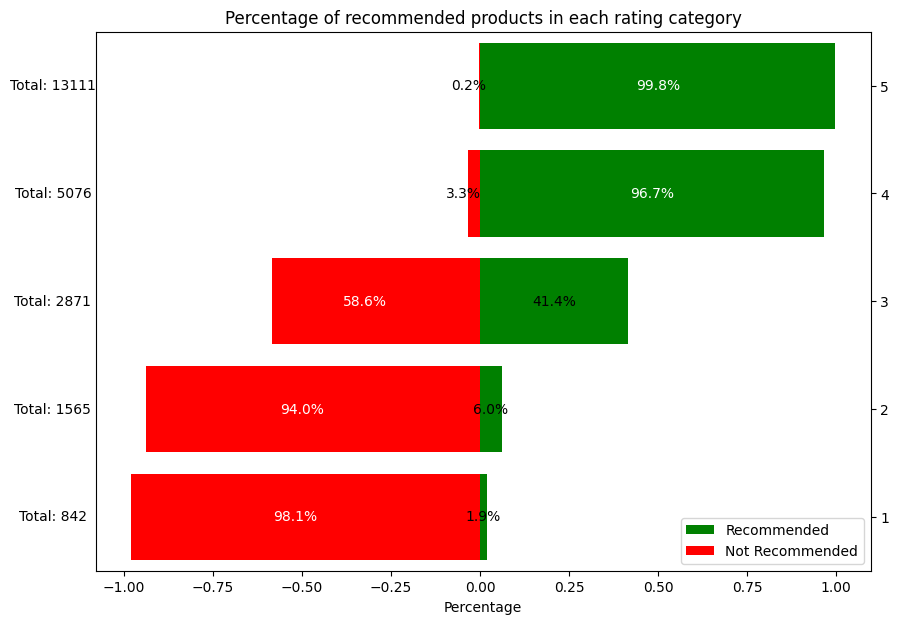

In [18]:
rating_recommended_percentage = df.groupby("Rating")["Recommended IND"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Not Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = df['Rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='green', label='Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Not Recommended'], color='red', label='Not Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()


It is observed that the most recommendations occur for products with a 5 rating, while the least recommendations occur for products with arating.

In [19]:
print(df[df['Rating'] == 5]['Recommended IND'].value_counts())

1    13086

0       25

Name: Recommended IND, dtype: int64


In [20]:
df[df["Title"].isnull()]["Positive Feedback Count"].value_counts()

0      2214
1       539
2       270
3       175
4       119
5        91
6        65
7        52
8        43
9        35
10       31
12       16
14       16
11       15
15       13
18       11
19        9
28        7
13        7
17        7
16        6
20        6
27        5
22        5
23        5
26        4
32        2
36        2
38        2
31        2
21        2
24        2
44        1
30        1
42        1
56        1
117       1
33        1
35        1
29        1
46        1
71        1
43        1
Name: Positive Feedback Count, dtype: int64

In [21]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [22]:
df["Positive Feedback Count"].value_counts()

0      11155
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64

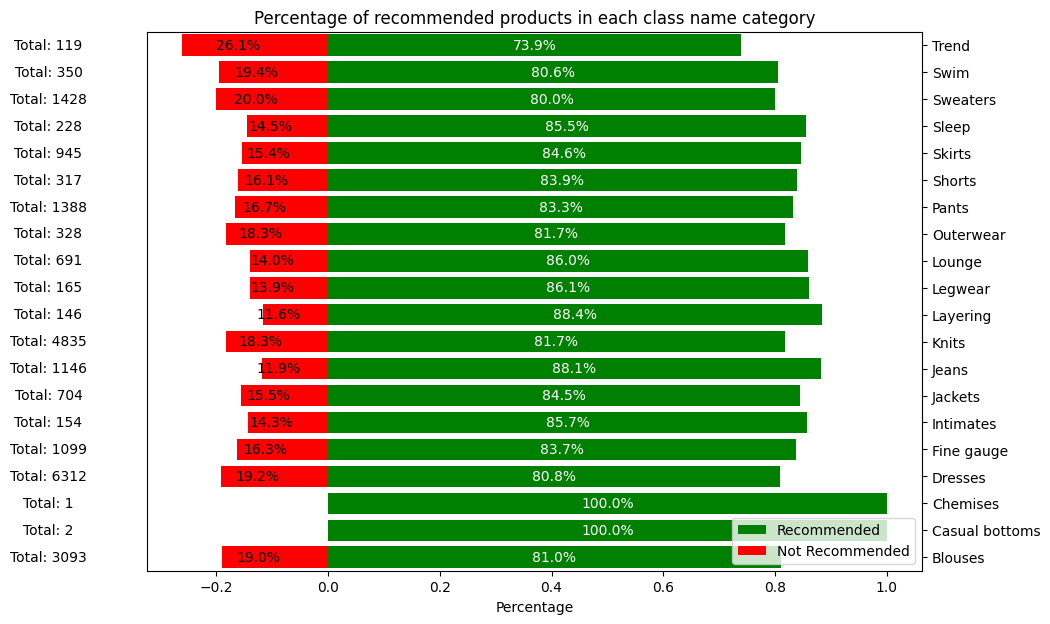

In [23]:
class_name_recommended_percentage = df.groupby("Class Name")["Recommended IND"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = df['Class Name'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='green', label='Recommended')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='red', label='Not Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()


It is observed that, across all categories, Dresses have both the highest and lowest number of recommendations. Specifically, within the Dresses category, the products tend to have a higher recommendation rate internally.


In [24]:
df["Recommended IND"].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

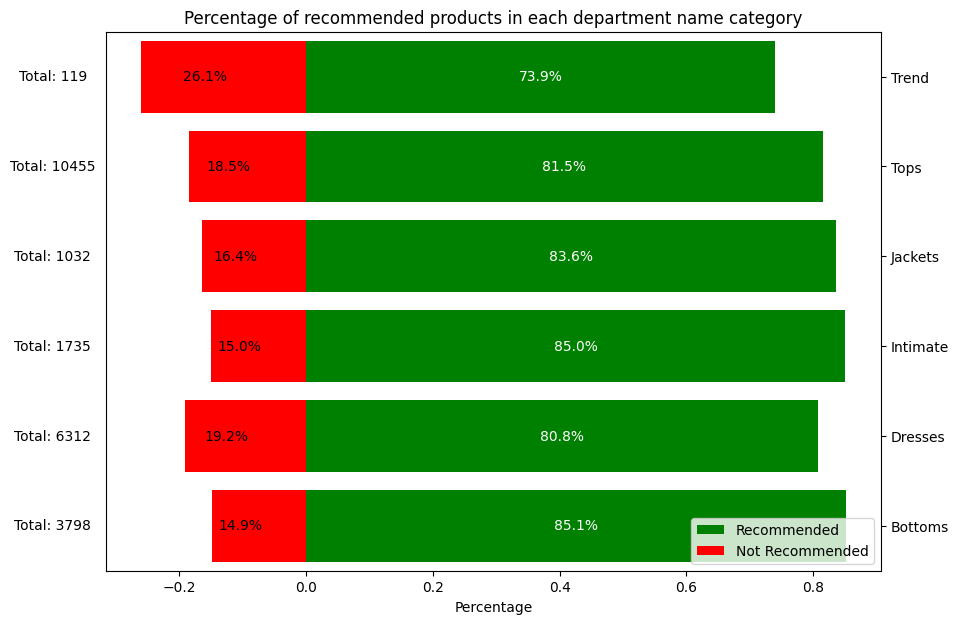

In [25]:
department_name_recommended_percentage = df.groupby("Department Name")["Recommended IND"].value_counts(normalize=True).unstack().fillna(0)
department_name_recommended_percentage['Not Recommended'] = 1 - department_name_recommended_percentage[1]
department_name_counts = df['Department Name'].value_counts()

department_name_counts = department_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (department_name, count) in enumerate(department_name_counts.items()):
    ax.text(-0.4, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(department_name_recommended_percentage.index.astype(str), department_name_recommended_percentage[1], color='green', label='Recommended')

# Not Recommended
ax.barh(department_name_recommended_percentage.index.astype(str), -department_name_recommended_percentage['Not Recommended'], color='red', label='Not Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(department_name_recommended_percentage)))
ax.set_yticklabels(department_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(department_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each department name category")
plt.xlabel("Percentage")
plt.show()


It is observed that, across all categories, Top category products have both the highest and lowest number of recommendations. Specifically, within the Top category, the products tend to have a higher recommendation rate internally.



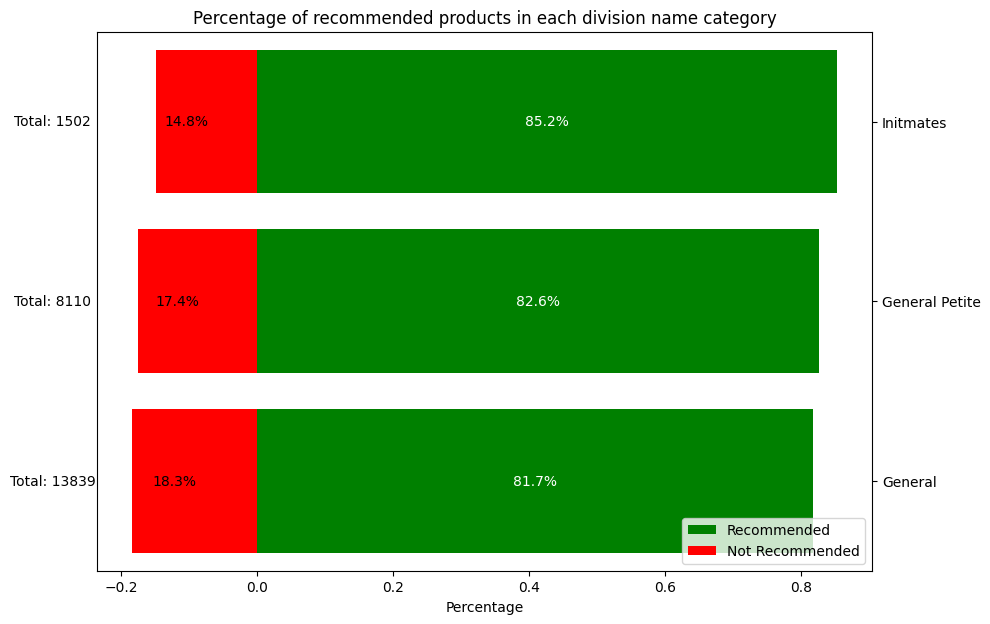

In [26]:
division_name_recommended_percentage = df.groupby("Division Name")["Recommended IND"].value_counts(normalize=True).unstack().fillna(0)
division_name_recommended_percentage['Not Recommended'] = 1 - division_name_recommended_percentage[1]
division_name_counts = df['Division Name'].value_counts()

division_name_counts = division_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (division_name, count) in enumerate(division_name_counts.items()):
    ax.text(-0.3, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(division_name_recommended_percentage.index.astype(str), division_name_recommended_percentage[1], color='green', label='Recommended')

# Not Recommended
ax.barh(division_name_recommended_percentage.index.astype(str), -division_name_recommended_percentage['Not Recommended'], color='red', label='Not Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(division_name_recommended_percentage)))
ax.set_yticklabels(division_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(division_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each division name category")
plt.xlabel("Percentage")
plt.show()


It is observed that, across all categories, General category products have both the highest and lowest number of recommendations. Specifically, within the General category, the products tend to have a higher recommendation rate internally.



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 23465 entries, 0 to 23485

Data columns (total 10 columns):

 #   Column                   Non-Null Count  Dtype 

---  ------                   --------------  ----- 

 0   Clothing ID              23465 non-null  int64 

 1   Age                      23465 non-null  int64 

 2   Title                    19676 non-null  object

 3   Review Text              22640 non-null  object

 4   Rating                   23465 non-null  int64 

 5   Recommended IND          23465 non-null  int64 

 6   Positive Feedback Count  23465 non-null  int64 

 7   Division Name            23451 non-null  object

 8   Department Name          23451 non-null  object

 9   Class Name               23451 non-null  object

dtypes: int64(5), object(5)

memory usage: 2.0+ MB


In [28]:
# plt.figure(figsize=(8, 10))
# ax=df.corr(numeric_only = True)["Recommended IND"].sort_values().drop("Recommended IND").plot(kind="barh")
# ax.bar_label(ax.containers[0], fmt="%.2f")
# plt.show()

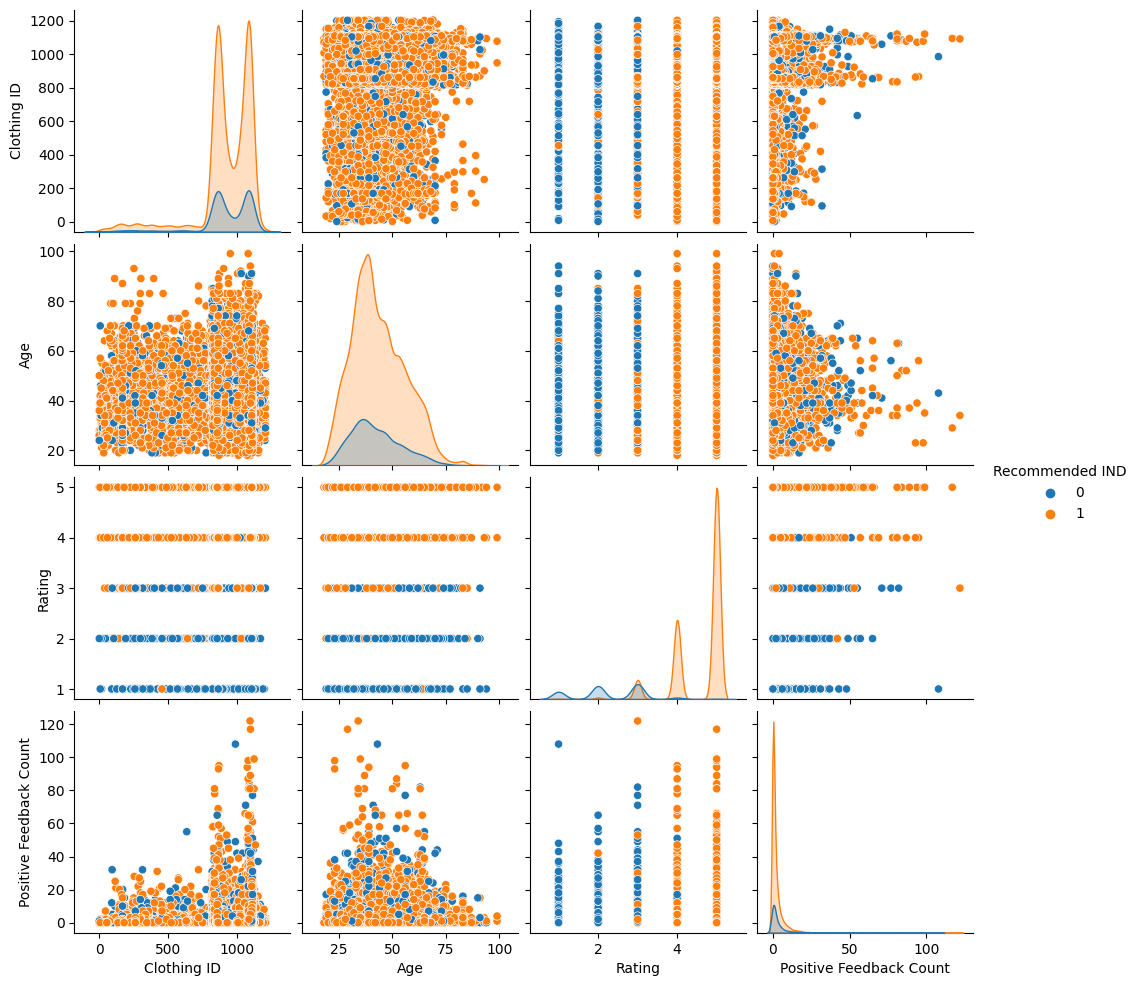

In [29]:
sns.pairplot(df, hue = "Recommended IND")

In [30]:
df["Recommended IND"].value_counts(normalize = True)

1    0.822203
0    0.177797
Name: Recommended IND, dtype: float64

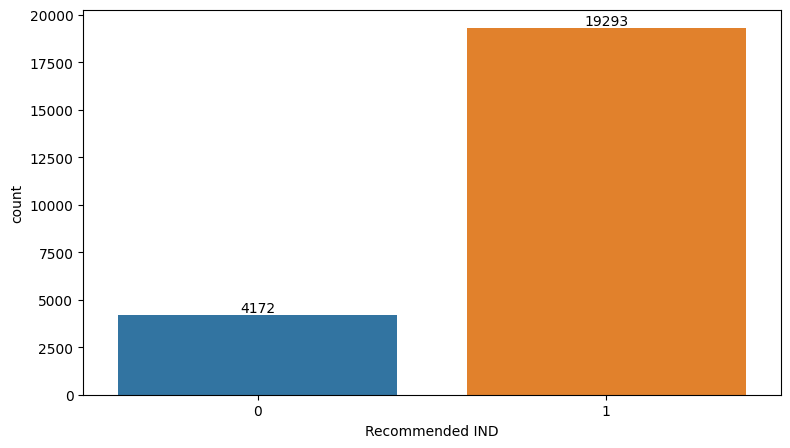

In [31]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

The classes in the data exhibit significant numerical imbalances, forming an imbalanced dataset. To address this, certain parameters such as class_weight and sample_weight need to be utilized.
Here, an attempt will be made to increase the scores of the 0 class. As algorithms typically yield results for the 1 class, using mapping, the 0 class will be relabeled as 1, and vice versa. This transformation enables easier tracking of what were previously the 0 class, now relabeled as the new 1 class.



# Feature Selection and Data Cleaning

In [32]:
df_rec = df[["Review Text", "Recommended IND"]]
df_rec.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [33]:
df_rec.rename(columns={"Review Text": "review", "Recommended IND" : "recommend"}, inplace = True)
df_rec.head()

,review,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


In [34]:
missing_values(df_rec)

,Missing_Number,Missing_Percent
review,825,3.515875


In [35]:
print("First Shape :", df_rec.shape)
df_rec.dropna(inplace = True)
print("Last Shape after drop:", df_rec.shape)

First Shape : (23465, 2)

Last Shape after drop: (22640, 2)


# Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



Tokenization, Noise Removal, Lexicon Normalization 

In [36]:
list(df_rec.review.sample(2))

["This top is so cute on. would look great on anyone as the style, quality, and color is incredible. highly recommend, even at this price. you won't regret it.",
 "These jeans are really soft, comfortable, and flattering, but only after you go a size down. all the other pilcro jeans i've bought have been a consistent 30, but when i got these they were baggy. i exchanged them for a 29, and they were just the ticket."]

In [37]:
stop_words = stopwords.words("english")

for i in ["not", "no"]:
  stop_words.remove(i)

In [38]:
def cleaning(data):
    #1. Correction of text
    spell=Speller(fast=True)
    correction_data=spell(data)

    #2. Contraction of text
    contraction_data=contractions.fix(correction_data)

    #3. Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())

    #4. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #5. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #6. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #10. joining
    return " ".join(text_cleaned)

In [39]:
positive_sentences = df_rec[df_rec["recommend"] == 1]["review"]
positive_sentences

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review, Length: 18539, dtype: object

In [40]:
negative_sentences = df_rec[df_rec["recommend"] == 0]["review"]
negative_sentences

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: review, Length: 4101, dtype: object

In [41]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet 

In [42]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

In [ ]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_positive.generate(positive_words)

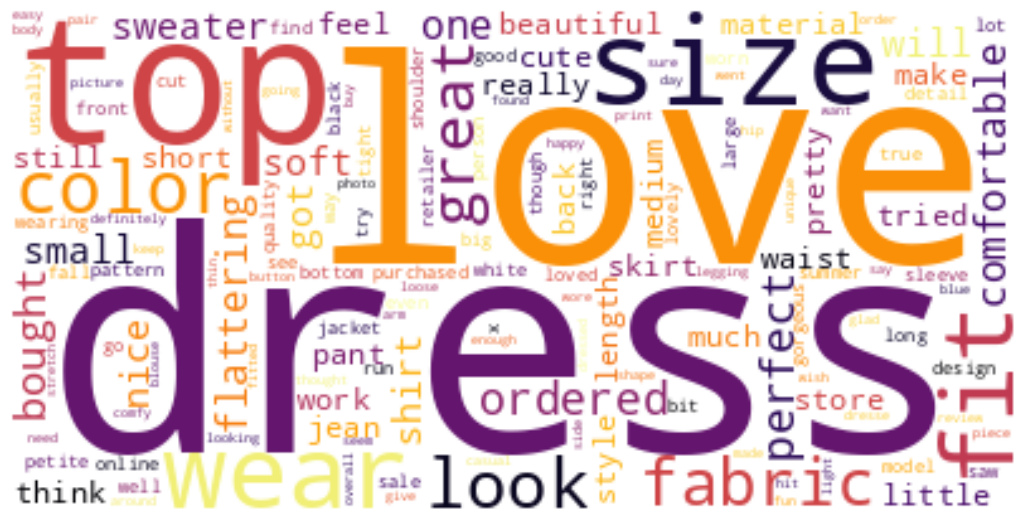

In [46]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

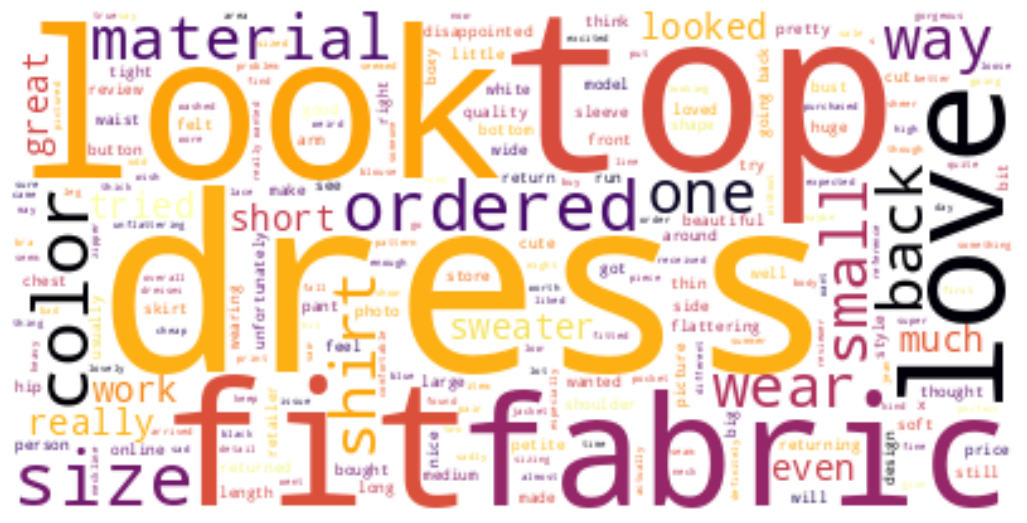

In [47]:
wordcloud_negative = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()